<a href="https://colab.research.google.com/github/priyanshu3103/Decision-Tree/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Priyanshu Barapatre

Working as an intern at GRIP@Spark foundation (data science and business analytics)

Task-01:Prediction using Decision Tree Algorithm 






In [84]:
# Importing some libraries for creating decision tree to predict the data. 


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [86]:
# Loading the dataset

data=pd.read_csv('/content/Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [87]:
# Understanding the general information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
# Check the dimension of dataset

data.shape

(150, 6)

In [89]:
data.drop(columns=['Id'],inplace=True)

In [90]:
# This function gives the basic information in numeric form about data for each neumeric fratures.

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [91]:
# Check the null values on the given dataset

data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [92]:
# Counting the data piont for each class label

data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

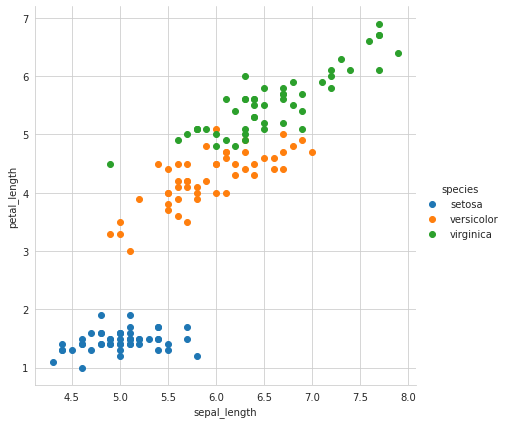

In [93]:
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

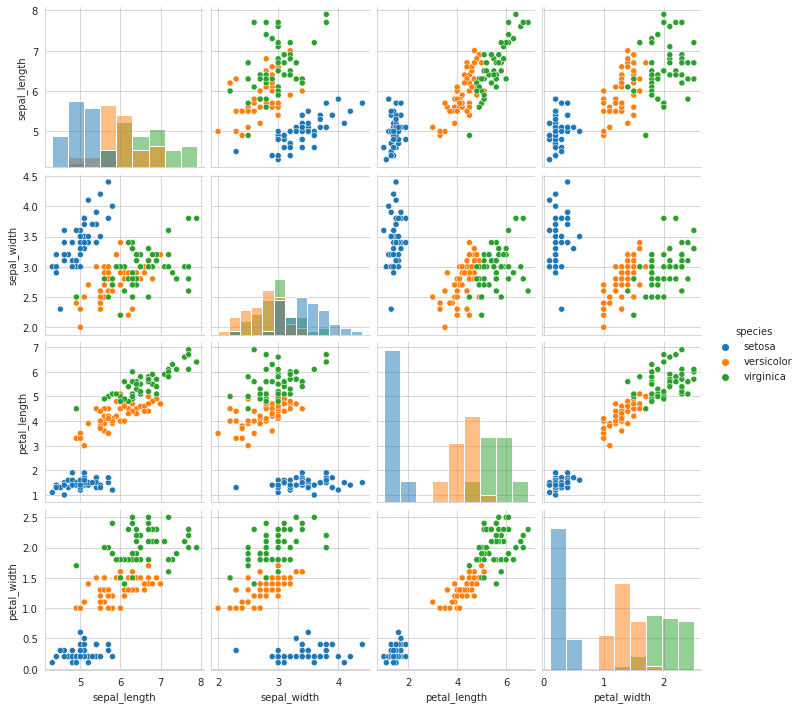

In [94]:
# Visualize the data in the form of pairplot

penguins = sns.load_dataset("iris")
sns.pairplot(penguins, hue="species", data=data,diag_kind="hist")

In [141]:
# Extracting the data between independent and dependent Variable 

a=data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
b=data['Species']

In [171]:
# Spliting the data into training and testing

x_train, x_test, y_train, y_test= train_test_split(a, b, test_size= 0.30, random_state=42) # 80% training and 20% test


In [173]:
# Fitting Decision Tree classifier to the training data 

classifier= DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [174]:
#Predicting the test set result

y_pred= classifier.predict(x_test) 
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [175]:
#Creating the Confusion matrix  

confusion= multilabel_confusion_matrix(y_test, y_pred)
confusion

array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

In [176]:
# Represent the "Actual data"  and "Predicted data" in seperate column.

pre_data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}) 
pre_data.head(10)

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [168]:
# Load the iris data and split into two parts "iris.data" and "iris.target".
iris = load_iris()
x_train = iris.data
y_train = iris.target

# # Fit the classifier with default hyper-parameters
# classifier= DecisionTreeClassifier(random_state=1234)
# classifier = classifier.fit(x_train, y_train)

In [177]:
#Representing the final data in text format

text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.60
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.60
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_2 >  4.8

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

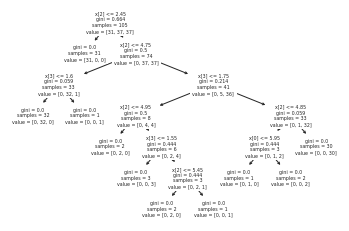

In [178]:
tree.plot_tree(classifier)

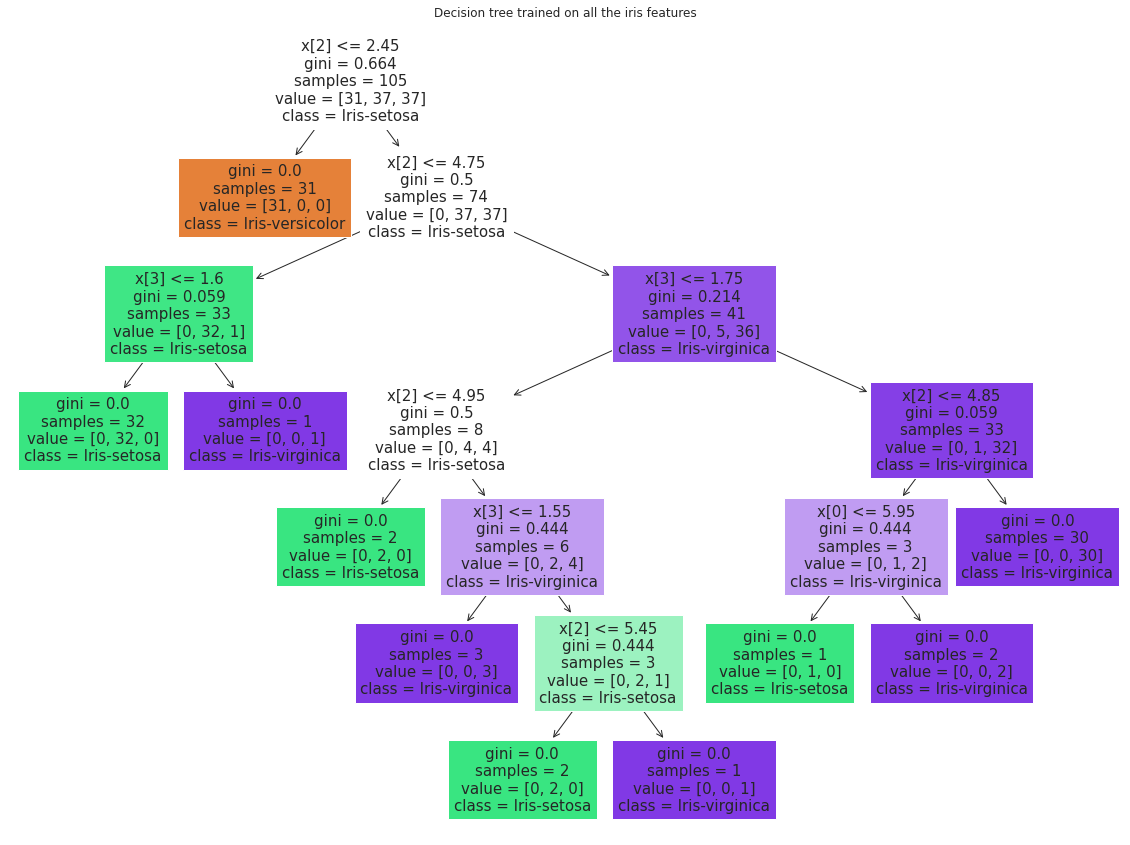

In [179]:
#Representing the final data in graphical format

plt.figure(figsize=(20,15))
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(classifier,class_names=["Iris-versicolor","Iris-setosa","Iris-virginica"], filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [180]:
print("Accuracy :" ,classifier.score(x_test,y_test)*100)

Accuracy : 100.0


In [181]:
# Predict the target value with best accuracy

from sklearn import metrics
print("The model accuracy score on unseen data is :",(metrics.accuracy_score(y_test, y_pred)* 100),"%")

The model accuracy score on unseen data is : 100.0 %


In [183]:
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,5.8,2.7,5.1,1.9,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
88,5.6,3.0,4.1,1.3,Iris-versicolor


In [182]:
#sample input 

test=[[5.1, 3.5, 1.4, 0.2],
      [6.0, 2.2, 5.0, 1.5],
      [6.5, 2.8, 4.6, 1.5]]

print(classifier.predict(test))

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.